In [2]:
import scipy.linalg
import numpy as np
from numpy import *
from scipy import optimize
import matplotlib.pyplot as plt

Реализация примеров из книги Титова:
- 3.1:

Значения коэффициентов:
c(0)=-1.2600000
c(1)=1.4900000
c(2)=-0.1500000
Уравнение кривой Ym=-1.260000+(1.490000)*x+(-0.150000)*x^2
Сумма площадей квадратов отклонений равна 0.072000


C:\Users\setus\AppData\Local\Temp\ipykernel_18240\3657070502.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Сумма площадей квадратов отклонений равна %.6f" % v)


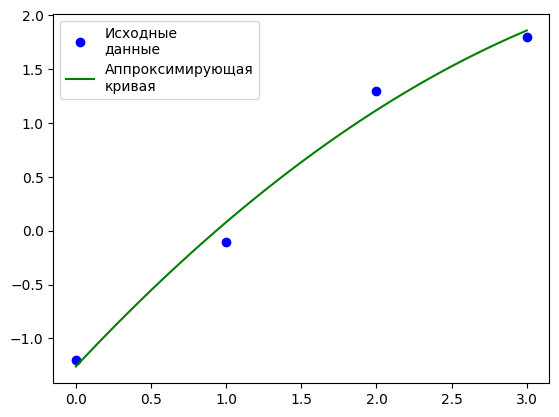

In [3]:
# Задание исходных данных (табличная функция)
x = np.array([0, 1, 2, 3])
y = np.array([-1.2, -0.1, 1.3, 1.8])

# Построение матрицы A для метода наименьших квадратов
A = x[:, np.newaxis] ** [0, 1, 2]

# Вычисление коэффициентов параболы методом наименьших квадратов
res = linalg.lstsq(A, y, rcond=None)

print("Значения коэффициентов:")
for i in range(3):
    print("c(%i)=%.7f" % (i, res[0][i]))

# Извлечение коэффициентов параболы
a, b, c = res[0][0], res[0][1], res[0][2]

print("Уравнение кривой Ym=%.6f+(%.6f)*x+(%.6f)*x^2" % (a, b, c))

# Вычисление суммы квадратов откклонений
v = res[1]
print("Сумма площадей квадратов отклонений равна %.6f" % v)

# Генерация значений 
x1 = np.linspace(min(x), max(x), 100)
ym = a + b * x1 + c * x1 ** 2

# Построение графика исходных данных и аппроксимирующей кривой
plt.plot(x, y, 'bo', label="Исходные\nданные")
plt.plot(x1, ym, label="Аппроксимирующая\nкривая", c='g')
plt.legend()
plt.show()


- 3.2:

Коэффициенты подобранной зависимости:
a= 4.000196
b= 1.999998
c= 4.999244
Уравнение кривой Y=4.000196*x*cos(1.999998x)+4.999244
Сумма площадей квадратов отклонений равна 0.001124


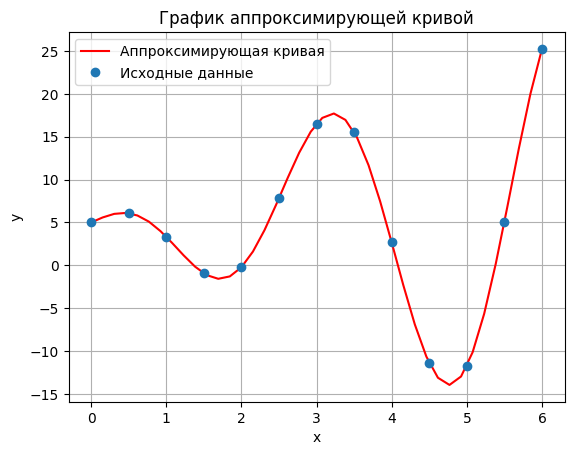

In [4]:

# задаем исходные данные x и y
x=np.linspace(0,6,13);
y=[5.02,6.08,3.33,-0.93,-0.22,7.83,16.52,15.55,
 2.67,-11.42,-11.78,5.09,25.25];
# задаем аппроксимирующую кривую как функцию
# аргумента х и трех искомых параметров a, b и c
def f(x, a, b, c):
 return a*x*np.cos(b*x)+c;
def g(x0):
 return y- f(x, *x0) # определяем функцию невязок
x0_init = (1,2,3) # задаем начальное приближение
# передаем в функцию leastsq требуемые параметры
x_opt, _ = optimize.leastsq(g, x0_init)
a, b, c =x_opt[0], x_opt[1], x_opt[2]
print("Коэффициенты подобранной зависимости:")
print("a= %.6f" % a)
print("b= %.6f" % b)
print("c= %.6f" % c)
print("Уравнение кривой Y=%.6f*x*cos(%.6fx)+%.6f" % (a,b,c))
v=np.sum((f(x, a, b, c)-y)**2)
print("Сумма площадей квадратов отклонений равна %.6f" % v)
x1=np.linspace(0,6,40) # задаем пределы значений х
# для построения графика полученной кривой
w=f(x1,a,b,c) # вычисляем
# значения полученной кривой в этих точках и строим график
plt.plot(x1,w,'r')
plt.plot(x,y,'o')
plt.title("График аппроксимирующей кривой") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid() # наносим на график сетку
plt.legend(('Аппроксимирующая кривая', 'Исходные данные'))
plt.show()


Вариант 4: 

Параметры линейной аппроксимации (a, b): [-0.06309524  6.77067858]
Параметры квадратичной аппроксимации (a, b, c): [-0.02817466  0.01297638  6.73264276]


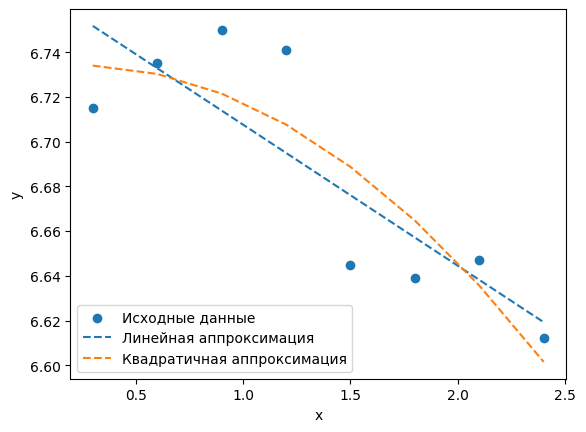

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Заданные данные
x = np.array([0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4])
y = np.array([6.715, 6.735, 6.750, 6.741, 6.645, 6.639, 6.647, 6.612])

def linear_fit(x, a, b):
    return a * x + b

def quadratic_fit(x, a, b, c):
    return a * x**2 + b * x + c

# Аппроксимация многочленом первой степени
params_linear, covariance_linear = curve_fit(linear_fit, x, y)
y_linear = linear_fit(x, *params_linear)

# Аппроксимация многочленом второй степени
params_quadratic, covariance_quadratic = curve_fit(quadratic_fit, x, y)
y_quadratic = quadratic_fit(x, *params_quadratic)

print("Параметры линейной аппроксимации (a, b):", params_linear)
print("Параметры квадратичной аппроксимации (a, b, c):", params_quadratic)

# Построение графиков
plt.scatter(x, y, label='Исходные данные')
plt.plot(x, y_linear, label='Линейная аппроксимация', linestyle='--')
plt.plot(x, y_quadratic, label='Квадратичная аппроксимация', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
